In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

In [2]:
birth_death = gs.ReactionModel(
    
                                species= {
                                            'protein': 0
                                            },

                                propensities= {
                                                'kr': 100, 
                                                'gamma':10
                                                },
                                                

                                reactions= {
                                            'translation':['kr'], 
                                            'degradation':['gamma', 'protein']
                                            },

                                q= {
                                    'translation': {'create': ['protein']}, 
                                    'degradation': {'destroy': ['protein']}})

In [3]:
positive_feedback = gs.Gillespie(tmax=1, sampling_time = 0.01,reaction_model = birth_death, model_name='positive_feedback', cells=1)
positive_feedback.simulate()

100%|██████████| 1/1 [00:00<00:00, 55.79it/s]


In [4]:
df = pd.read_csv('positive_feedback.csv', delimiter='|')
df.head()

,protein,time,cell
0,0,0.00,1
1,0,0.01,1
2,0,0.02,1
3,1,0.03,1
4,1,0.04,1


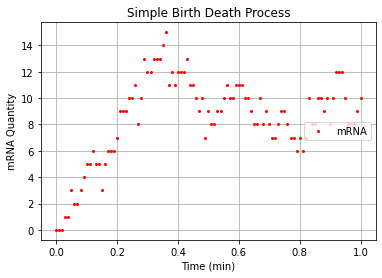

In [5]:
plt.plot(df.time, df.protein, 'ro', ms=2, label='mRNA')
plt.grid(True)
plt.title('Simple Birth Death Process')
plt.xlabel('Time (min)')
plt.ylabel('mRNA Quantity')
plt.legend(loc=5)

In [6]:
repressilator = gs.ReactionModel(
                                species = {
                                                'tetR': 550,
                                                'lacI': 1600,
                                                'alphacl': 1000,
                                                'GFP': 100
                                                },

                                propensities = {
                                                'kd_tetR': 0.02,
                                                'kd_lacI': 0.02,
                                                'kd_alphacl': 0.02,
                                                'kc_GFP': 0.05,
                                                'kd_GFP': 1/100000
                                                },
                                
                                reactions = {
                                                'PdtetR':       ['kd_tetR', 'alphacl'],
                                                'PdlacI':       ['kd_lacI', 'tetR'],
                                                'Pdalphacl':    ['kd_alphacl', 'lacI'],
                                                'GFP_cre' :     ['kc_GFP', 'lacI'],
                                                'GFP_des':      ['kd_GFP', 'tetR', 'GFP']
                                                },
                                
                                q = {
                                        'PdtetR':       {'create': ['lacI'],    'destroy': ['tetR']},
                                        'PdlacI':       {'create': ['alphacl'], 'destroy': ['lacI']},
                                        'Pdalphacl':    {'create': ['tetR'],    'destroy': ['alphacl']},
                                        'GFP_cre':      {'create': ['GFP']},
                                        'GFP_des':      {'destroy': ['GFP']}
                                        }
                                )


In [7]:
repre = gs.Gillespie(tmax=50, sampling_time = 5,reaction_model = repressilator, model_name='repre', cells=1)
repre.simulate()

100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


In [8]:
df = pd.read_csv('repre.csv', delimiter='|')
df.head()

,tetR,lacI,alphacl,GFP,time,cell
0,550,1600,1000,100,0,1
1,623,1640,887,465,5,1
2,697,1670,783,883,10,1
3,762,1693,695,1276,15,1
4,826,1675,649,1646,20,1


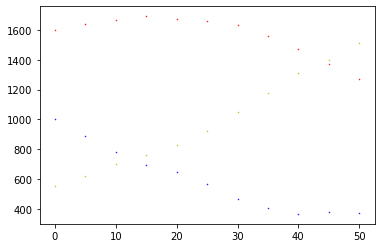

In [9]:
plt.plot(df.time, df.tetR, 'yo', ms=0.5)
plt.plot(df.time, df.lacI, 'ro', ms=0.5)
plt.plot(df.time, df.alphacl, 'bo', ms=0.5)

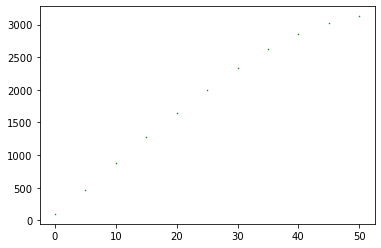

In [10]:
plt.plot(df.time, df.GFP, 'go', ms=0.5)

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

birth_death = gs.ReactionModel(
    
                                species= {
                                            'protein': 0
                                            },

                                propensities= {
                                                'kr': 10, 
                                                'gamma':1
                                                },

                                reactions= {
                                            'translation':['kr'], 
                                            'degradation':['gamma', 'protein']
                                            },

                                q= {
                                    'translation': {'burst': ['protein']}, 
                                    'degradation': {'destroy': ['protein']}
                                    })

birth_death_model = gs.Gillespie(tmax=40, sampling_time =0.1,reaction_model = birth_death, model_name='bd', cells=1)
birth_death_model.simulate_division(model='adder')

100%|██████████| 1/1 [00:15<00:00, 15.15s/it]


In [16]:
df_2 = pd.read_csv('bd.csv', delimiter='|')
df_2

,protein,time,cell,cell_size,division_time
0,0,0.0,1,0.9051,20.6217
1,286,0.1,1,0.9086,20.5217
2,401,0.2,1,0.9121,20.4217
3,784,0.3,1,0.9156,20.3217
4,838,0.4,1,0.9191,20.2217
...,...,...,...,...,...
396,1281,39.6,1,1.0396,16.7049
397,1306,39.7,1,1.0437,16.6049
398,1319,39.8,1,1.0477,16.5049
399,1327,39.9,1,1.0517,16.4049


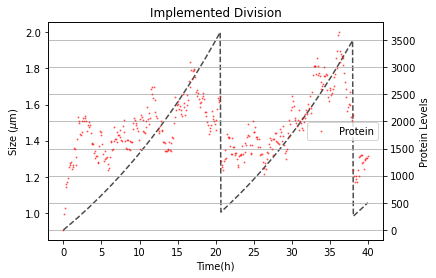

In [17]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_2.time,df_2.cell_size, '--',color='black', linewidth=1.5, label='size', alpha=0.7)
ax2.plot(df_2.time,df_2.protein,'ro', alpha=0.5, linewidth=0.5, ms=1, label='Protein')

ax1.set_xlabel('Time(h)')
ax1.set_ylabel(r'Size (${\mu}$m)')
ax2.set_ylabel('Protein Levels')
plt.title('Implemented Division')
ax2.grid()
plt.legend(loc=5)

In [18]:
birth_death_model.calculate_sorted_tau()

{'translation': 0.020754323010586453,
 'degradation': inf,
 'reference_division_time': 0}